In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets('data')

Extracting data/train-images-idx3-ubyte.gz
Extracting data/train-labels-idx1-ubyte.gz
Extracting data/t10k-images-idx3-ubyte.gz
Extracting data/t10k-labels-idx1-ubyte.gz


In [3]:
learning_rate = 0.05
batch_size = 100

# num_channels = [4, 8]

In [4]:
mnist.train.labels.shape[0] / batch_size

550.0

In [5]:
def random(shape):
    return tf.truncated_normal(shape, stddev=0.1)

In [6]:
def layer(x, in_size, out_size, activation):
    w = tf.Variable(random([in_size, out_size]))
    b = tf.Variable(random([out_size]))
    u = tf.matmul(x, w) + b
    return activation(u)

In [7]:
def cost(y, z):
    cross_entropy = -tf.reduce_sum(y * tf.log(z), axis=1)
    return tf.reduce_mean(cross_entropy)

In [8]:
def draw_incorrect():
    images = mnist.test.images
    labels = mnist.test.labels

    p, c = session.run([predict, correct], feed_dict=test_data)

    fig, axes = plt.subplots(5, 5, figsize=(10, 10))

    for i, ax in zip(np.arange(len(c))[~c][:25], axes.flat):
        ax.set_axis_off()
        ax.imshow(images[i].reshape(28, 28))
        ax.set_title('P {}, R {}'.format(p[i], labels[i]))

    plt.show()

In [9]:
x = tf.placeholder(tf.float32, [None, 28 * 28])
y = tf.placeholder(tf.int64, [None])
keep_prob = tf.placeholder(tf.float32)

z1 = layer(x, 28 * 28, 100, tf.nn.relu) # hidden layer 1: 764 -> 100
z2 = layer(z1, 100, 50, tf.nn.relu) # hidden layer 2: 100 -> 50
drop = tf.nn.dropout(z2, keep_prob)
z = layer(z2, 50, 10, tf.nn.softmax) # output layer: 50 -> 10

loss = cost(tf.one_hot(y, 10), z)

train = tf.train.AdamOptimizer(0.0001).minimize(loss)

In [10]:
z1.shape, z2.shape, z.shape

(TensorShape([Dimension(None), Dimension(100)]),
 TensorShape([Dimension(None), Dimension(50)]),
 TensorShape([Dimension(None), Dimension(10)]))

In [11]:
predict = tf.argmax(z, axis=1) # 정답 예측
correct = tf.equal(predict, y) # 정답 여부 (True, False, True, False ...)
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32)) # 정답률

In [12]:
session = tf.Session()
session.run(tf.global_variables_initializer())

test_data = {
    x: mnist.test.images,
    y: mnist.test.labels,
    keep_prob: 1.0
}

for i in range(100):
    print(i + 1)
    for j in range(100):
        images, labels = mnist.train.next_batch(batch_size)
        data = {
            x: images,
            y: labels,
            keep_prob: 0.5
        }
        session.run(train, feed_dict=data)
    print('loss = {}'.format(session.run(loss, feed_dict=data)))
    print('accuracy = {}'.format(session.run(accuracy, feed_dict=test_data)))
    print()

1
loss = 2.0508041381835938
accuracy = 0.42410001158714294

2
loss = 1.3575286865234375
accuracy = 0.7005000114440918

3
loss = 0.9296520948410034
accuracy = 0.8086000084877014

4
loss = 0.7888423800468445
accuracy = 0.8388000130653381

5
loss = 0.5173695087432861
accuracy = 0.8648999929428101

6
loss = 0.41036418080329895
accuracy = 0.879800021648407

7
loss = 0.4061655104160309
accuracy = 0.8888999819755554

8
loss = 0.38533297181129456
accuracy = 0.8974000215530396

9
loss = 0.5290080904960632
accuracy = 0.902899980545044

10
loss = 0.3902806043624878
accuracy = 0.9057999849319458

11
loss = 0.44464361667633057
accuracy = 0.9101999998092651

12
loss = 0.3772491216659546
accuracy = 0.9101999998092651

13
loss = 0.21040882170200348
accuracy = 0.9151999950408936

14
loss = 0.2968887686729431
accuracy = 0.9171000123023987

15
loss = 0.4009127914905548
accuracy = 0.9186000227928162

16
loss = 0.2757587730884552
accuracy = 0.9193999767303467

17
loss = 0.19138634204864502
accuracy = 0.920

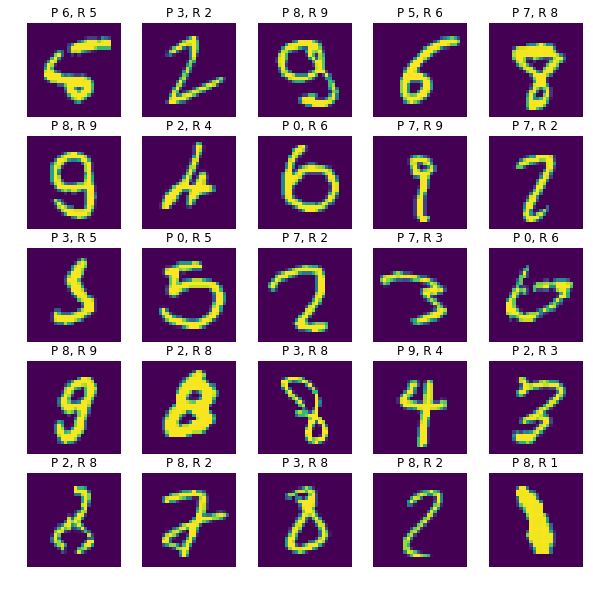

In [13]:
draw_incorrect()

Convolution

[https://en.wikipedia.org/wiki/Kernel_(image_processing)](https://en.wikipedia.org/wiki/Kernel_%28image_processing%29)

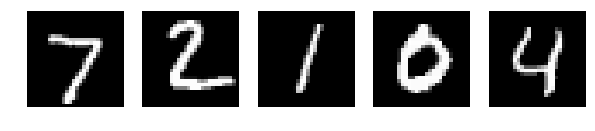

In [14]:
# draw images

def draw(images):
    count = images.shape[0]
    fig, axes = plt.subplots(1, count, figsize=(count * 2, 2))
    for i in range(count):
        axes[i].set_axis_off()
        axes[i].imshow(images[i].reshape(28, 28), cmap='gray')
    plt.show()

draw(mnist.test.images[:5])

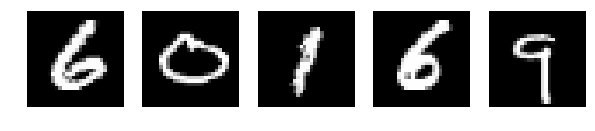

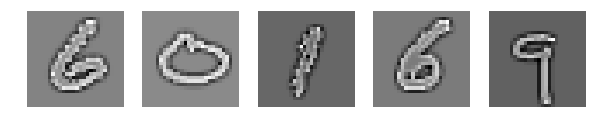

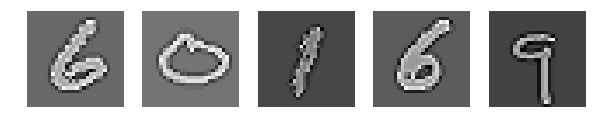

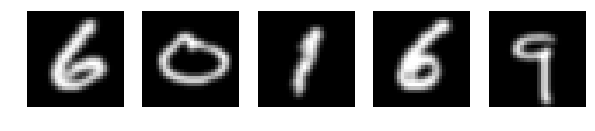

In [15]:
# image processing

x = tf.placeholder(tf.float32, [None, 28 * 28])

kernels = [
    # Edge detection
    [
        [-1.0, -1.0, -1.0],
        [-1.0,  8.0, -1.0],
        [-1.0, -1.0, -1.0]
    ],
    # Sharpen
    [
        [ 0.0, -1.0,  0.0],
        [-1.0,  5.0, -1.0],
        [ 0.0, -1.0,  0.0]
    ],
    # Gaussian blur
    [
        [1 / 16, 2 / 16, 1 / 16],
        [2 / 16, 4 / 16, 2 / 16],
        [1 / 16, 2 / 16, 1 / 16]
    ]
]

w = np.stack([np.array(i).reshape(3, 3, 1) for i in kernels], axis=3)

xx = tf.reshape(x, [-1, 28, 28, 1])

y = tf.nn.conv2d(xx, w,
                 strides=[1, 1, 1, 1], padding='SAME')

images = mnist.train.images[:5]

new_images = session.run(y, feed_dict={ x: images })

draw(images)

for i in range(3):
    draw(new_images.take(i, axis=3).reshape([-1, 28 * 28]))

In [16]:
np.stack([[1, 2, 3], [4, 5, 6]], axis=0)

array([[1, 2, 3],
       [4, 5, 6]])

In [17]:
np.stack([[1, 2, 3], [4, 5, 6]], axis=1)

array([[1, 4],
       [2, 5],
       [3, 6]])

In [18]:
w.take(0, axis=3)

array([[[-1.],
        [-1.],
        [-1.]],

       [[-1.],
        [ 8.],
        [-1.]],

       [[-1.],
        [-1.],
        [-1.]]])

In [19]:
# https://www.tensorflow.org/api_docs/python/tf/nn/conv2d

def conv(x, in_ch, out_ch):
    w = tf.Variable(random([5, 5, in_ch, out_ch]))
    b = tf.Variable(random([out_ch]))
    return tf.nn.conv2d(x, w, strides=[1, 1, 1, 1], padding='SAME') \
           + b # 눈에 띄게 하려고 다음 줄로 넘김 :)

In [20]:
# https://www.tensorflow.org/api_docs/python/tf/nn/max_pool

def pool(x):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

In [21]:
x = tf.placeholder(tf.float32, [None, 28 * 28])
y = tf.placeholder(tf.int64, [None])
keep_prob = tf.placeholder(tf.float32)

xx = tf.reshape(x, [-1, 28, 28, 1])
z1 = conv(xx, 1, 4)
z2 = pool(z1)
z3 = conv(z2, 4, 8)
z4 = pool(z3)

fc_size = 7 * 7 * 8
fc_z = tf.reshape(z4, [-1, fc_size])

h_z = layer(fc_z, fc_size, 200, tf.nn.relu)
drop = tf.nn.dropout(h_z, keep_prob)
z = layer(drop, 200, 10, tf.nn.softmax)

loss = cost(tf.one_hot(y, 10), z)

train = tf.train.AdamOptimizer(0.0001).minimize(loss)

In [22]:
predict = tf.argmax(z, axis=1)
correct = tf.equal(predict, y)
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

In [23]:
session = tf.Session()
session.run(tf.global_variables_initializer())

test_data = {
    x: mnist.test.images,
    y: mnist.test.labels,
    keep_prob: 1.0
}

for i in range(100):
    print(i + 1)
    for j in range(100):
        images, labels = mnist.train.next_batch(batch_size)
        data = {
            x: images,
            y: labels,
            keep_prob: 0.5
        }
        session.run(train, feed_dict=data)
    print('loss = {}'.format(session.run(loss, feed_dict=data)))
    print('accuracy = {}'.format(session.run(accuracy, feed_dict=test_data)))
    print()

1
loss = 2.049105644226074
accuracy = 0.5390999913215637

2
loss = 1.5817517042160034
accuracy = 0.7337999939918518

3
loss = 0.9900250434875488
accuracy = 0.8113999962806702

4
loss = 0.8993934392929077
accuracy = 0.8492000102996826

5
loss = 0.6145815849304199
accuracy = 0.8708000183105469

6
loss = 0.7389550805091858
accuracy = 0.8827999830245972

7
loss = 0.5587338805198669
accuracy = 0.8953999876976013

8
loss = 0.5174174308776855
accuracy = 0.9021999835968018

9
loss = 0.5890480875968933
accuracy = 0.9063000082969666

10
loss = 0.4237896800041199
accuracy = 0.9092000126838684

11
loss = 0.2735954523086548
accuracy = 0.9125999808311462

12
loss = 0.3008754849433899
accuracy = 0.9132999777793884

13
loss = 0.30178776383399963
accuracy = 0.9214000105857849

14
loss = 0.31777268648147583
accuracy = 0.9240000247955322

15
loss = 0.33925220370292664
accuracy = 0.9261999726295471

16
loss = 0.34720396995544434
accuracy = 0.9293000102043152

17
loss = 0.34815797209739685
accuracy = 0.930

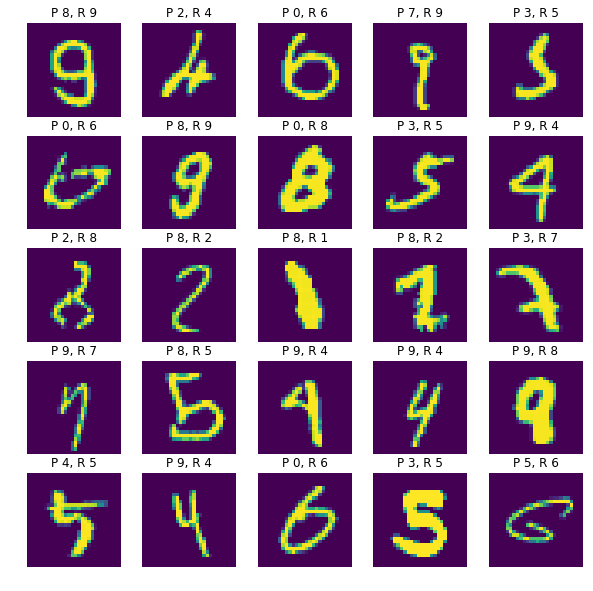

In [24]:
draw_incorrect()

7


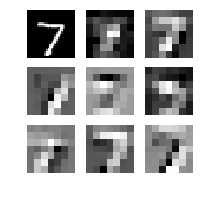

2


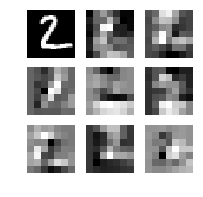

1


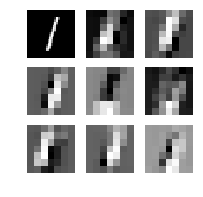

0


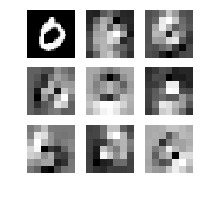

4


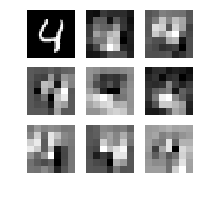

In [25]:
images = mnist.test.images[:5]
labels = mnist.test.labels[:5]

test_data = {
    x: images,
    keep_prob: 1.0
}

features = session.run(z4, feed_dict=test_data)

for index in range(5):
    print(labels[index])
    fig, axes = plt.subplots(3, 3, figsize=(3, 3))
    for i, ax in enumerate(axes.flat):
        ax.set_axis_off()
        if i == 0:
            ax.imshow(images[index].reshape(28, 28), cmap='gray')
        else:
            ax.imshow(features[index, :, :, i - 1], cmap='gray')
    plt.show()